La demanda de una pieza cara de repuesto de un avión de pasajeros es de 0,1,2 o 3 unidades por mes con probabilidades de .2, .3, .4 y .1, respectivamente. El taller de mantenimiento de la aerolínea inicia la operación con existencias de 5 unidades y regresará el nivel de las existencias a 5 unidades inmediatamente después que se reduzca a 2 unidades.

**1.** Idee el procedimiento para muestrear la demanda.

In [ ]:
pip install simpy

In [ ]:
import simpy
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

In [ ]:
# Parámetros de la simulación
PROBABILIDAD = [0.2, 0.3, 0.4, 0.1]  # Probabilidades para 0, 1, 2, y 3 unidades de demanda
VALORES = [0, 1, 2, 3]        # Posibles demandas por mes
NIVEL_MAXIMO = 5                      # Nivel máximo de existencias
NIVEL_MINIMO = 2                      # Nivel mínimo para reabastecer
TIEMPO = 12                # Simulación para 12 meses

In [ ]:
# Genera la demanda mensual de acuerdo con las probabilidades
def demanda():
    return random.choices(VALORES, PROBABILIDAD)[0]

In [ ]:
# Proceso de simulación para el inventario de piezas de repuesto
def inventario(env, inv):
    while True:
        # Genera la demanda para el mes actual
        d = demanda()
        print(f"Mes {env.now + 1}: Demanda = {d}, Inventario inicial = {inv.level}")

        # Satisface la demanda si hay suficiente inventario y la demanda es mayor a 0
        if d > 0:
            if d <= inv.level:
                inv.get(d)
            else:
                print("¡Demanda no satisfecha completamente!")

        # Reabastece el inventario si baja al nivel mínimo
        if inv.level <= NIVEL_MINIMO:
            inv.put(NIVEL_MAXIMO - inv.level)
            print("Inventario reabastecido a 5 unidades.")

        print(f"Mes {env.now + 1}: Inventario final = {inv.level}\n")

        # Espera un mes antes de la siguiente demanda
        yield env.timeout(1)

In [ ]:
# Configuración de la simulación
env = simpy.Environment()
inv = simpy.Container(env, capacity=NIVEL_MAXIMO, init=NIVEL_MAXIMO)

In [ ]:
# Inicia la simulación
env.process(inventario(env, inv))
env.run(until=TIEMPO)

Mes 1: Demanda = 1, Inventario inicial = 5
Mes 1: Inventario final = 4

Mes 2: Demanda = 1, Inventario inicial = 4
Mes 2: Inventario final = 3

Mes 3: Demanda = 0, Inventario inicial = 3
Mes 3: Inventario final = 3

Mes 4: Demanda = 1, Inventario inicial = 3
Inventario reabastecido a 5 unidades.
Mes 4: Inventario final = 5

Mes 5: Demanda = 2, Inventario inicial = 5
Mes 5: Inventario final = 3

Mes 6: Demanda = 1, Inventario inicial = 3
Inventario reabastecido a 5 unidades.
Mes 6: Inventario final = 5

Mes 7: Demanda = 0, Inventario inicial = 5
Mes 7: Inventario final = 5

Mes 8: Demanda = 1, Inventario inicial = 5
Mes 8: Inventario final = 4

Mes 9: Demanda = 1, Inventario inicial = 4
Mes 9: Inventario final = 3

Mes 10: Demanda = 1, Inventario inicial = 3
Inventario reabastecido a 5 unidades.
Mes 10: Inventario final = 5

Mes 11: Demanda = 1, Inventario inicial = 5
Mes 11: Inventario final = 4

Mes 12: Demanda = 1, Inventario inicial = 4
Mes 12: Inventario final = 3



**2.** ¿Cuántos meses transcurrirán hasta que ocurra la primera reposición?

In [ ]:
# Parámetros de la simulación
DEMANDA_PROBS = [0.2, 0.3, 0.4, 0.1]  # Probabilidades para 0, 1, 2, y 3 unidades de demanda
DEMANDA_VALORES = [0, 1, 2, 3]        # Posibles demandas por mes
NIVEL_MAXIMO = 5                      # Nivel máximo de existencias
NIVEL_MINIMO = 2                      # Nivel mínimo para reabastecer

# Genera la demanda mensual de acuerdo con las probabilidades
def generar_demanda():
    return random.choices(DEMANDA_VALORES, DEMANDA_PROBS)[0]

# Proceso de simulación para el inventario de piezas de repuesto
def simulacion_inventario(env, inventario):
    meses = 0
    while True:
        # Genera la demanda para el mes actual
        demanda = generar_demanda()
        meses += 1
        print(f"Mes {meses}: Demanda = {demanda}, Inventario inicial = {inventario.level}")

        # Satisface la demanda si hay suficiente inventario y la demanda es mayor a 0
        if demanda > 0:
            if demanda <= inventario.level:
                inventario.get(demanda)
            else:
                print("¡Demanda no satisfecha completamente!")

        # Reabastece el inventario si baja al nivel mínimo
        if inventario.level <= NIVEL_MINIMO:
            inventario.put(NIVEL_MAXIMO - inventario.level)
            print(f"Inventario reabastecido a 5 unidades en el mes {meses}.")
            break

        print(f"Mes {meses}: Inventario final = {inventario.level}\n")

        # Espera un mes antes de la siguiente demanda
        yield env.timeout(1)

    print(f"La primera reposición ocurrió en el mes {meses}.")

# Configuración de la simulación
env = simpy.Environment()
inventario = simpy.Container(env, capacity=NIVEL_MAXIMO, init=NIVEL_MAXIMO)

# Inicia la simulación
env.process(simulacion_inventario(env, inventario))
env.run()

Mes 1: Demanda = 0, Inventario inicial = 5
Mes 1: Inventario final = 5

Mes 2: Demanda = 2, Inventario inicial = 5
Mes 2: Inventario final = 3

Mes 3: Demanda = 1, Inventario inicial = 3
Inventario reabastecido a 5 unidades en el mes 3.
La primera reposición ocurrió en el mes 3.


In [ ]:
# Veamos que sucede con la compañia al pasar varios meses

# Parámetros de la simulación
PROBABILIDAD = [0.2, 0.3, 0.4, 0.1]  # Probabilidades para 0, 1, 2, y 3 unidades de demanda
VALORES = [0, 1, 2, 3]        # Posibles demandas por mes
NIVEL_MAXIMO = 5                      # Nivel máximo de existencias
NIVEL_MINIMO = 2                      # Nivel mínimo para reabastecer
TIEMPO = 480               # Simulación para 40 años (480 meses)

In [ ]:
# Genera la demanda mensual de acuerdo con las probabilidades
def demanda():
    return random.choices(VALORES, PROBABILIDAD)[0]

In [ ]:
# Proceso de simulación para el inventario de piezas de repuesto
def simulacion_inventario(env, inventario, demandas, inventarios):
    while True:
        # Genera la demanda para el mes actual
        d = demanda()
        demandas.append(d)  # Almacena la demanda del mes

        # Satisface la demanda si hay suficiente inventario
        if d > 0 and d <= inventario.level:
            inventario.get(d)

        # Reabastece el inventario si baja al nivel mínimo
        if inventario.level <= NIVEL_MINIMO:
            inventario.put(NIVEL_MAXIMO - inventario.level)  # Reabastece a 5 unidades

        inventarios.append(inventario.level)  # Almacena el nivel de inventario final del mes

        # Espera un mes antes de la siguiente demanda
        yield env.timeout(1)

In [ ]:
# Configuración de la simulación
env = simpy.Environment()
inventario = simpy.Container(env, capacity=NIVEL_MAXIMO, init=NIVEL_MAXIMO)

In [ ]:
# Listas para registrar datos de cada mes
demandas = []
inventarios = []

# Inicia la simulación
env.process(simulacion_inventario(env, inventario, demandas, inventarios))
env.run(until=TIEMPO)

In [ ]:
# Conversión de datos a DataFrame
df = pd.DataFrame({
    "Mes": range(1, TIEMPO + 1),
    "Demanda": demandas,
    "Inventario": inventarios
})

# Cálculo de la media móvil y el intervalo de confianza del 95% para la demanda y el inventario
df["Media_Demanda"] = df["Demanda"].expanding().mean()
df["Desv_Demanda"] = df["Demanda"].expanding().std()
df["IC_Demanda"] = 1.96 * df["Desv_Demanda"] / np.sqrt(df.index + 1)

df["Media_Inventario"] = df["Inventario"].expanding().mean()
df["Desv_Inventario"] = df["Inventario"].expanding().std()
df["IC_Inventario"] = 1.96 * df["Desv_Inventario"] / np.sqrt(df.index + 1)

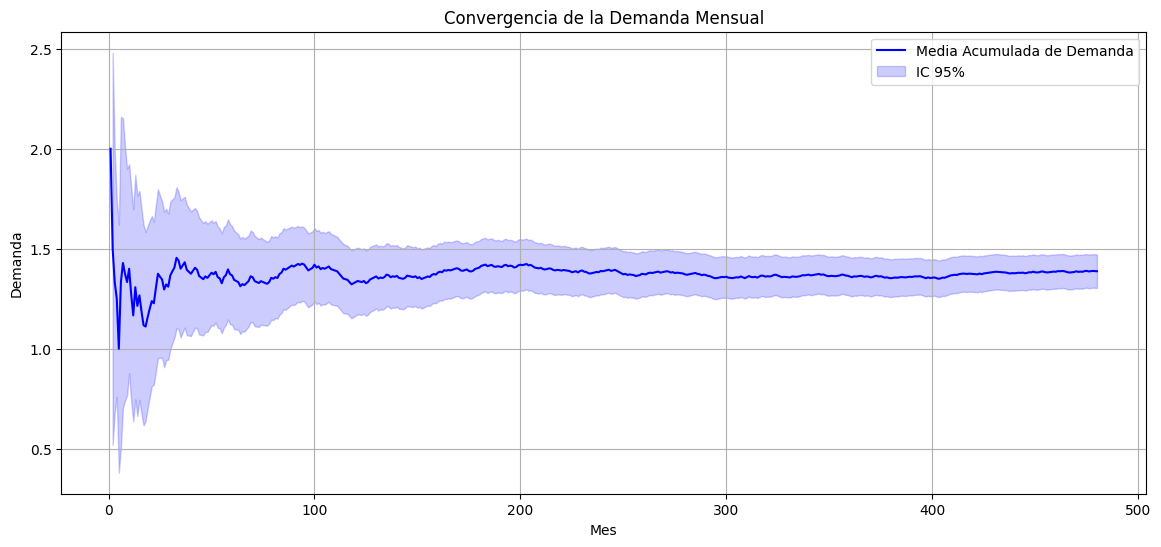

In [ ]:
# Gráfica de convergencia de la demanda
plt.figure(figsize=(14, 6))
plt.plot(df["Mes"], df["Media_Demanda"], label="Media Acumulada de Demanda", color="blue")
plt.fill_between(df["Mes"], df["Media_Demanda"] - df["IC_Demanda"], df["Media_Demanda"] + df["IC_Demanda"],
                 color="blue", alpha=0.2, label="IC 95%")
plt.xlabel("Mes")
plt.ylabel("Demanda")
plt.title("Convergencia de la Demanda Mensual")
plt.legend()
plt.grid(True)

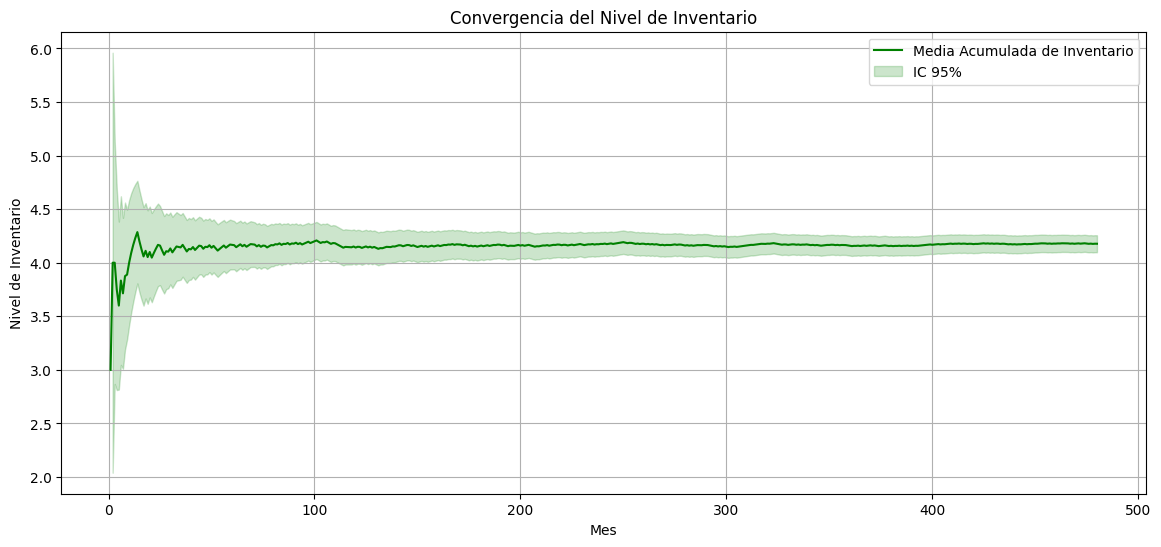

In [ ]:
# Gráfica de convergencia del nivel de inventario
plt.figure(figsize=(14, 6))
plt.plot(df["Mes"], df["Media_Inventario"], label="Media Acumulada de Inventario", color="green")
plt.fill_between(df["Mes"], df["Media_Inventario"] - df["IC_Inventario"], df["Media_Inventario"] + df["IC_Inventario"],
                 color="green", alpha=0.2, label="IC 95%")
plt.xlabel("Mes")
plt.ylabel("Nivel de Inventario")
plt.title("Convergencia del Nivel de Inventario")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Ejecuta la simulación 100 veces
resultados_demandas = []
resultados_inventarios = []

for i in range(100):
    # Configuración de la simulación
    env = simpy.Environment()
    inventario = simpy.Container(env, capacity=NIVEL_MAXIMO, init=NIVEL_MAXIMO)

    # Listas para registrar datos de cada mes
    demandas = []
    inventarios = []

    # Inicia la simulación
    env.process(simulacion_inventario(env, inventario, demandas, inventarios))
    env.run(until=TIEMPO)

    # Almacena los resultados de la simulación actual
    resultados_demandas.extend(demandas)
    resultados_inventarios.extend(inventarios)

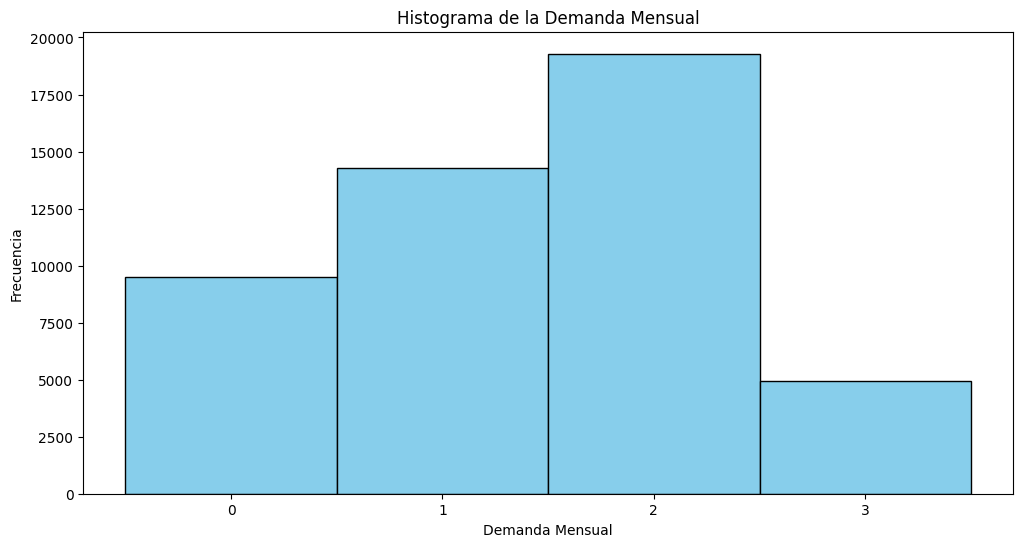

In [ ]:
# Genera el histograma de la demanda
plt.figure(figsize=(12, 6))
plt.hist(resultados_demandas, bins=range(5), align='left', color='skyblue', edgecolor='black')
plt.xlabel('Demanda Mensual')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Demanda Mensual')
plt.xticks([0, 1, 2, 3])
plt.show()

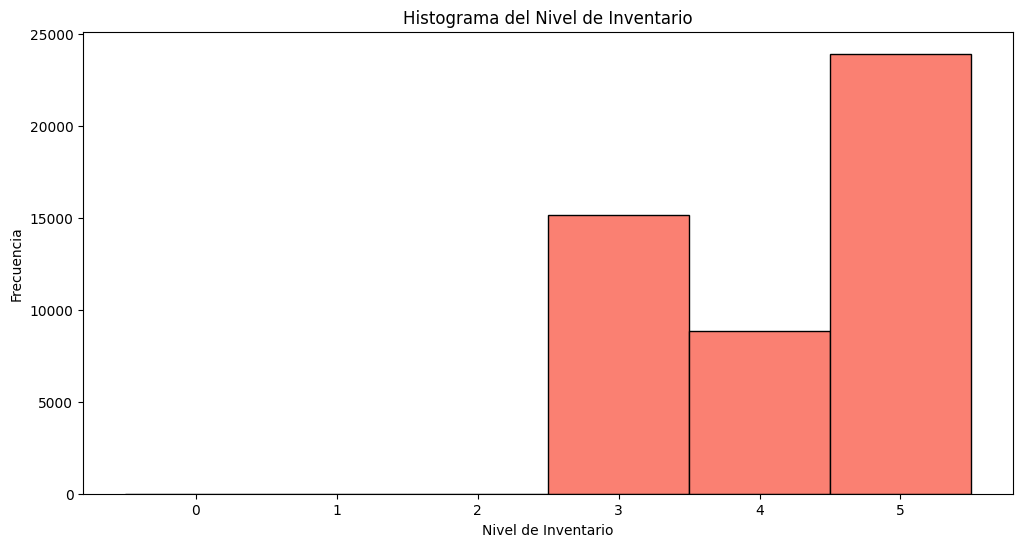

In [ ]:
# Genera el histograma del nivel de inventario
plt.figure(figsize=(12, 6))
plt.hist(resultados_inventarios, bins=range(NIVEL_MAXIMO + 2), align='left', color='salmon', edgecolor='black')
plt.xlabel('Nivel de Inventario')
plt.ylabel('Frecuencia')
plt.title('Histograma del Nivel de Inventario')
plt.xticks(range(NIVEL_MAXIMO + 1))
plt.show()

In [ ]:
# Función para calcular el intervalo de confianza
def intervalo_confianza(data, confianza=0.95):
    n = len(data)
    media = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)  # Error estándar de la media
    h = sem * t.ppf((1 + confianza) / 2, n - 1)  # Margen de error
    return media - h, media + h

In [ ]:
# Cálculo del intervalo de confianza para la demanda
ic_demanda = intervalo_confianza(resultados_demandas)
print(f"Intervalo de confianza para la demanda (95%): {ic_demanda}")

# Cálculo del intervalo de confianza para el nivel de inventario
ic_inventario = intervalo_confianza(resultados_inventarios)
print(f"Intervalo de confianza para el nivel de inventario (95%): {ic_inventario}")

Intervalo de confianza para la demanda (95%): (1.4012199783164028, 1.417655021683597)
Intervalo de confianza para el nivel de inventario (95%): (4.1744845480710975, 4.19030711859557)
